In [34]:
import pandas as pd

In [129]:
df_demog = pd.read_table('resources/subjects_HCA.csv',sep=',')
df_demog['subject'] = [ f'sub-{subject}' for subject in df_demog['subject'] ]
                

 
    
df_fs = pd.read_table('results/freesurfer_volumes.tsv')
df_hippunfold_fs = pd.read_table('results/hippunfold-freesurferatlas_volumes.tsv')
df_hippunfold_bigbrain = pd.read_table('results/hippunfold-bigbrainatlas_volumes.tsv')
df_ashs = pd.read_table('results/ashs_volumes.tsv')
df_hippunfold_ashs = pd.read_table('results/hippunfold-magdeburgatlas_volumes.tsv')


#add CA4 and DG in the bigbrain label (since these are not separated in FS or ASHS):
df_hippunfold_bigbrain['CA4_DG'] = df_hippunfold_bigbrain.CA4 + df_hippunfold_bigbrain.DG

df_fs = pd.merge(df_demog,df_fs,on='subject')
df_ashs = pd.merge(df_demog,df_ashs,on='subject')
df_hippunfold_fs = pd.merge(df_demog,df_hippunfold_fs,on='subject')
df_hippunfold_ashs = pd.merge(df_demog,df_hippunfold_ashs,on='subject')
df_hippunfold_bigbrain = pd.merge(df_demog,df_hippunfold_bigbrain,on='subject')




<AxesSubplot:xlabel='Sub', ylabel='Sub'>

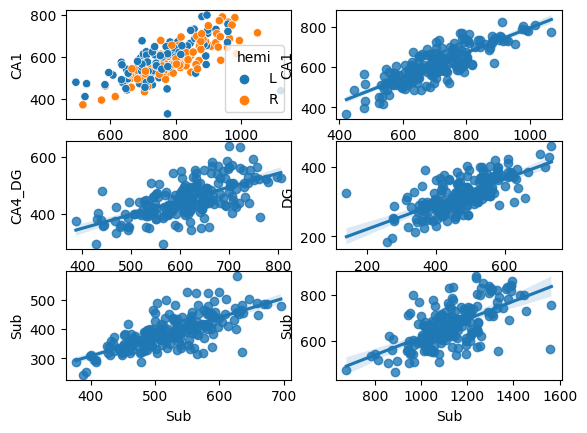

In [130]:

#scatterplot hippunfold vs other method

import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2,nrows=3)

sns.scatterplot(x=df_fs.CA1,y=df_hippunfold_fs.CA1,ax=axs[0][0],hue=df_hippunfold_fs.hemi)
sns.regplot(x=df_ashs.CA1,y=df_hippunfold_ashs.CA1,ax=axs[0][1])

sns.regplot(x=df_fs.CA4_DG,y=df_hippunfold_fs.CA4_DG,ax=axs[1][0])
sns.regplot(x=df_ashs.DG,y=df_hippunfold_ashs.DG,ax=axs[1][1])

sns.regplot(x=df_fs.Sub,y=df_hippunfold_fs.Sub,ax=axs[2][0])
sns.regplot(x=df_ashs.Sub,y=df_hippunfold_ashs.Sub,ax=axs[2][1])


<AxesSubplot:xlabel='interview_age', ylabel='Sub'>

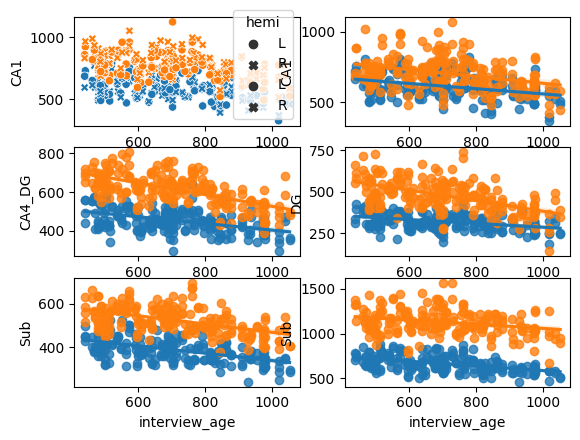

In [131]:
#scatterplot age vs vol for each method
fig, axs = plt.subplots(ncols=2,nrows=3)

sns.scatterplot(x=df_fs.interview_age,y=df_hippunfold_fs.CA1,ax=axs[0][0],style=df_fs.hemi)
sns.scatterplot(x=df_fs.interview_age,y=df_fs.CA1,ax=axs[0][0],style=df_fs.hemi)



sns.regplot(x=df_fs.interview_age,y=df_hippunfold_ashs.CA1,ax=axs[0][1])
sns.regplot(x=df_fs.interview_age,y=df_ashs.CA1,ax=axs[0][1])


sns.regplot(x=df_fs.interview_age,y=df_hippunfold_fs.CA4_DG,ax=axs[1][0])
sns.regplot(x=df_fs.interview_age,y=df_fs.CA4_DG,ax=axs[1][0])


sns.regplot(x=df_fs.interview_age,y=df_hippunfold_ashs.DG,ax=axs[1][1])
sns.regplot(x=df_fs.interview_age,y=df_ashs.DG,ax=axs[1][1])


sns.regplot(x=df_fs.interview_age,y=df_hippunfold_fs.Sub,ax=axs[2][0])
sns.regplot(x=df_fs.interview_age,y=df_fs.Sub,ax=axs[2][0])


sns.regplot(x=df_fs.interview_age,y=df_hippunfold_ashs.Sub,ax=axs[2][1])
sns.regplot(x=df_fs.interview_age,y=df_ashs.Sub,ax=axs[2][1])


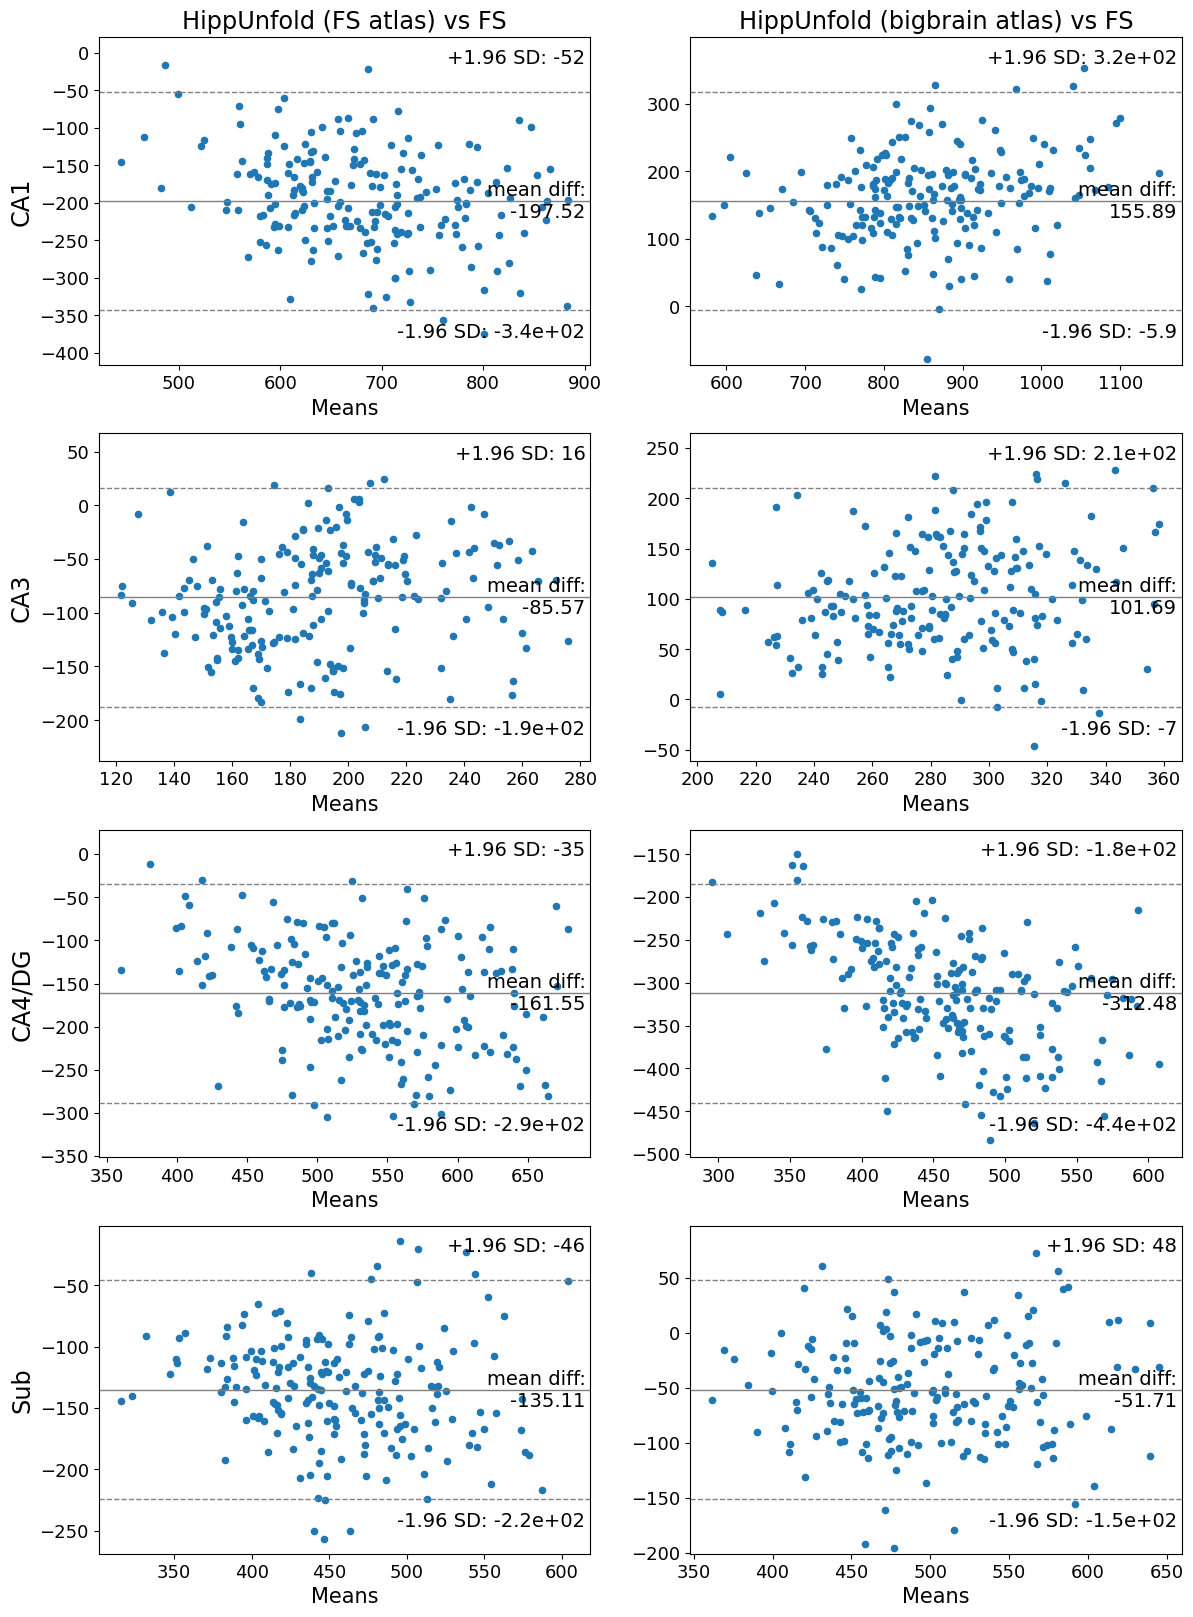

In [133]:
import statsmodels.api as sm

f, axs = plt.subplots(ncols=2,nrows=4, figsize=(12,16))
#f.tight_layout(pad=3)

sm.graphics.mean_diff_plot(df_hippunfold_fs.CA1,df_fs.CA1,ax=axs[0][0])
sm.graphics.mean_diff_plot(df_hippunfold_fs.CA3,df_fs.CA3,ax=axs[1][0])
sm.graphics.mean_diff_plot(df_hippunfold_fs.CA4_DG,df_fs.CA4_DG,ax=axs[2][0])
sm.graphics.mean_diff_plot(df_hippunfold_fs.Sub,df_fs.Sub,ax=axs[3][0])

sm.graphics.mean_diff_plot(df_hippunfold_bigbrain.CA1,df_fs.CA1,ax=axs[0][1])
sm.graphics.mean_diff_plot(df_hippunfold_bigbrain.CA3,df_fs.CA3,ax=axs[1][1])
sm.graphics.mean_diff_plot(df_hippunfold_bigbrain.CA4_DG,df_fs.CA4_DG,ax=axs[2][1])
sm.graphics.mean_diff_plot(df_hippunfold_bigbrain.Sub,df_fs.Sub,ax=axs[3][1])

rows = ['CA1','CA3','CA4/DG','Sub']
cols = ['HippUnfold (FS atlas) vs FS','HippUnfold (bigbrain atlas) vs FS']

for ax, col in zip(axs[0], cols):
    ax.set_title(col,size='xx-large')

for ax, row in zip(axs[:,0], rows):
    ax.set_ylabel(row, rotation=90, size='xx-large')

for ax in axs[:,1]:
    ax.set_ylabel('')

plt.show()

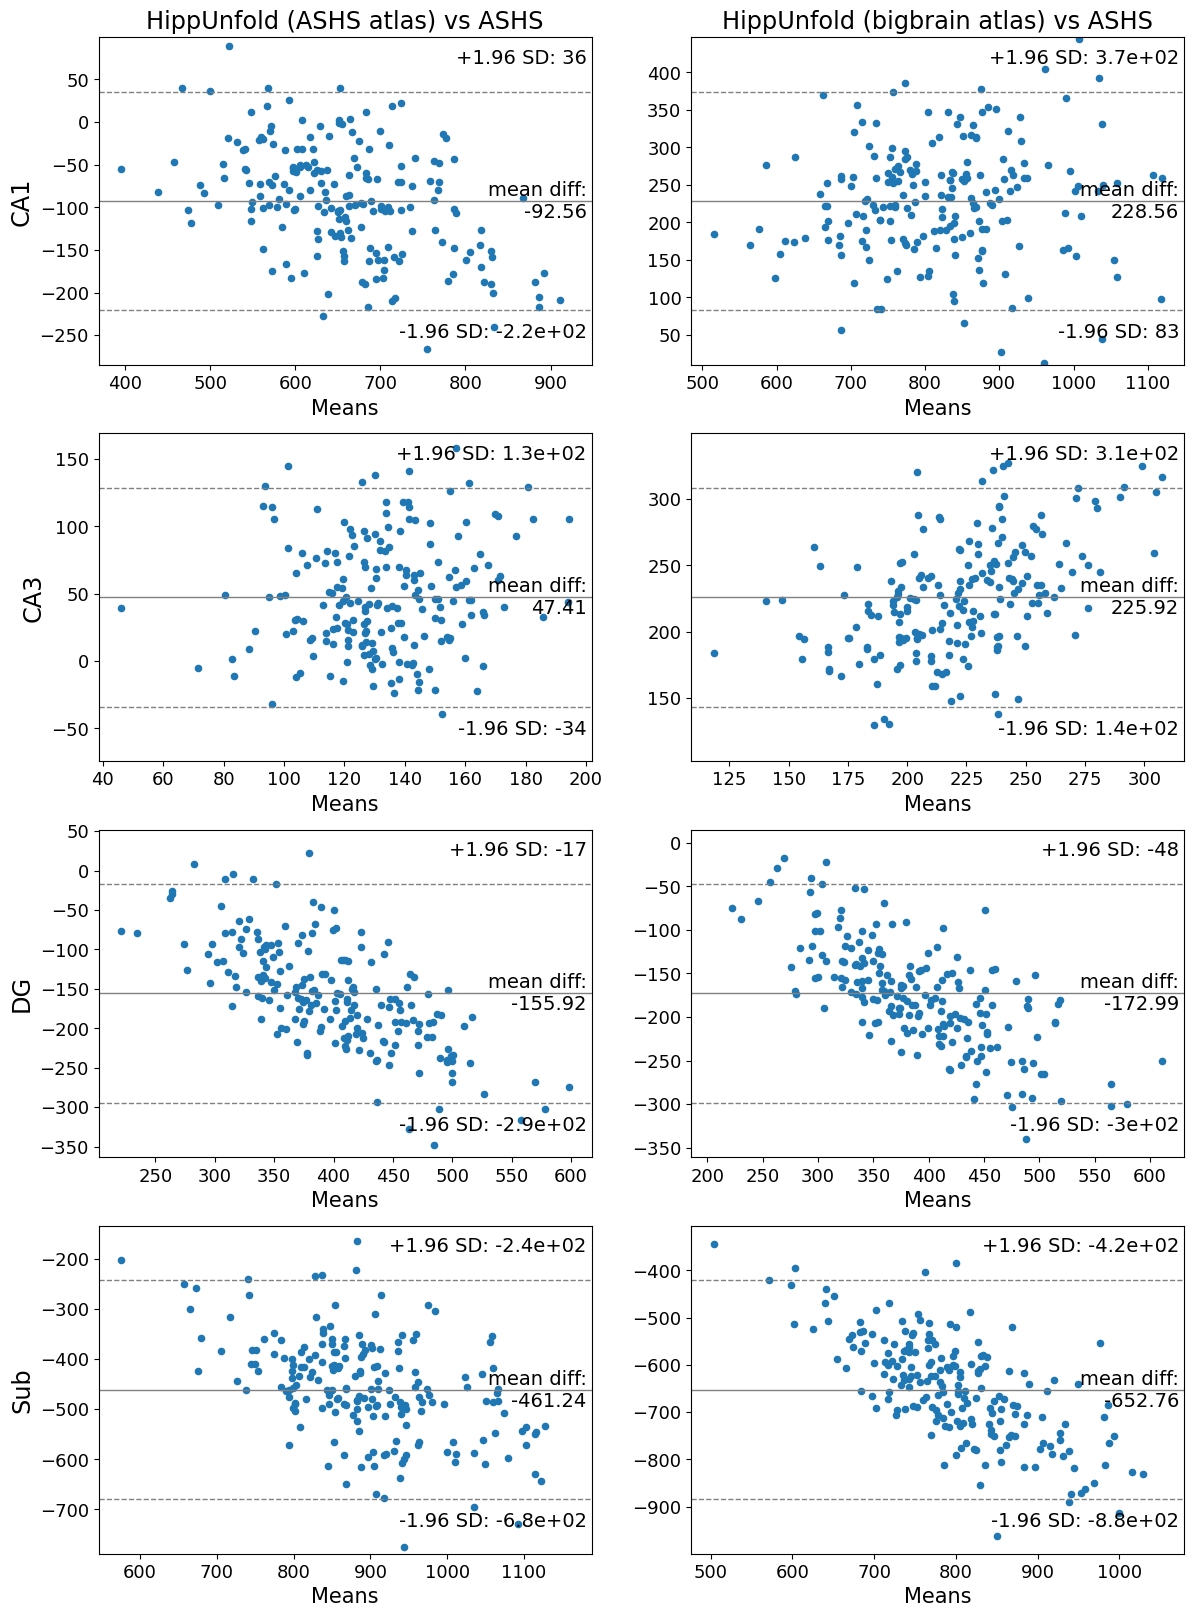

In [137]:
import statsmodels.api as sm

f, axs = plt.subplots(ncols=2,nrows=4, figsize=(12,16))

sm.graphics.mean_diff_plot(df_hippunfold_ashs.CA1,df_ashs.CA1,ax=axs[0][0])
sm.graphics.mean_diff_plot(df_hippunfold_ashs.CA3,df_ashs.CA3,ax=axs[1][0])
sm.graphics.mean_diff_plot(df_hippunfold_ashs.DG,df_ashs.DG,ax=axs[2][0])
sm.graphics.mean_diff_plot(df_hippunfold_ashs.Sub,df_ashs.Sub,ax=axs[3][0])


sm.graphics.mean_diff_plot(df_hippunfold_bigbrain.CA1,df_ashs.CA1,ax=axs[0][1])
sm.graphics.mean_diff_plot(df_hippunfold_bigbrain.CA3,df_ashs.CA3,ax=axs[1][1])
sm.graphics.mean_diff_plot(df_hippunfold_bigbrain.CA4_DG,df_ashs.DG,ax=axs[2][1])
sm.graphics.mean_diff_plot(df_hippunfold_bigbrain.Sub,df_ashs.Sub,ax=axs[3][1])

rows = ['CA1','CA3','DG','Sub']
cols = ['HippUnfold (ASHS atlas) vs ASHS','HippUnfold (bigbrain atlas) vs ASHS']

for ax, col in zip(axs[0], cols):
    ax.set_title(col,size='xx-large')

for ax, row in zip(axs[:,0], rows):
    ax.set_ylabel(row, rotation=90, size='xx-large')

for ax in axs[:,1]:
    ax.set_ylabel('')

plt.show()